In [1]:
# -*- coding: utf-8 -*-
"""
PREPARATION du fichier eco2mix-regional-cons-def pour analyses ultérieures en utilisant les TCH fournis par RTE dans la seconde version Eco2Mix 2013-2023
Created on 2024-06-29  11:00:07 2024

@author: Thierry ALLEM
"""

'\nPREPARATION du fichier eco2mix-regional-cons-def pour analyses ultérieures en utilisant les TCH fournis par RTE dans la seconde version Eco2Mix 2013-2023\nCreated on 2024-06-29  11:00:07 2024\n\n@author: Thierry ALLEM\n'

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates

In [3]:
import warnings
# Pour ignorer tous les warnings
warnings.filterwarnings('ignore')

In [4]:
# *************************************************  ECO2MIX REGIONALE DEF ************************************************************
# Import du fichiers de travail eco2mix_regional_def
df_eco2 = pd.read_csv('eco2mix-regional-cons-def.csv',sep = ';')
df_eco2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121408 entries, 0 to 2121407
Data columns (total 32 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Code INSEE région    int64  
 1   Région               object 
 2   Nature               object 
 3   Date                 object 
 4   Heure                object 
 5   Date - Heure         object 
 6   Consommation (MW)    float64
 7   Thermique (MW)       float64
 8   Nucléaire (MW)       float64
 9   Eolien (MW)          object 
 10  Solaire (MW)         float64
 11  Hydraulique (MW)     float64
 12  Pompage (MW)         float64
 13  Bioénergies (MW)     float64
 14  Ech. physiques (MW)  float64
 15  Stockage batterie    float64
 16  Déstockage batterie  float64
 17  Eolien terrestre     float64
 18  Eolien offshore      float64
 19  TCO Thermique (%)    float64
 20  TCH Thermique (%)    float64
 21  TCO Nucléaire (%)    float64
 22  TCH Nucléaire (%)    float64
 23  TCO Eolien (%)       float64
 24

In [5]:
# Brèves statitisques
df_eco2_statistiques = df_eco2.describe()

In [6]:
# Suppression des colonnes non utiles
colonnes_to_drop = ['Code INSEE région', 'Nature','Date - Heure','Eolien terrestre', 'Eolien offshore','TCO Thermique (%)','TCO Nucléaire (%)', 'TCO Eolien (%)','TCO Solaire (%)',
                    'TCO Hydraulique (%)','TCO Bioénergies (%)','Column 30']

# Comportant un taux assez élevé de valeurs manquantes, les colonnes TCO sont supprimées pour être recalculées dans une prochaine étape
df_eco2.drop(colonnes_to_drop, axis = 1, inplace =True)


In [7]:
# MODIFICATION DES NOMS ET TYPES DE VARIABLES

dictionnaire_entetes = {'Région' : 'region',
                'Nature' : 'nature',
                'Date' : 'date',
                'Heure' : 'heure',
                'Date - Heure' : 'date_heure_utc',
                'Consommation (MW)' : 'consommation',
                'Thermique (MW)' : 'thermique',
                'Nucléaire (MW)' : 'nucleaire',
                'Eolien (MW)' : 'eolien',
                'Solaire (MW)' : 'solaire',
                'Hydraulique (MW)' : 'hydraulique',
                'Pompage (MW)' : 'pompage',
                'Bioénergies (MW)' : 'bioenergies',
                'Ech. physiques (MW)' : 'ech_physiques',
                'Stockage batterie' : 'stockage_batterie',
                'Déstockage batterie' : 'destockage_batterie',
                'TCH Thermique (%)': 'tch_thermique_rte', 'TCH Nucléaire (%)' : 'tch_nucleaire_rte', 
                'TCH Eolien (%)':'tch_eolien_rte', 'TCH Solaire (%)' : 'tch_solaire_rte',
                'TCH Hydraulique (%)': 'tch_hydraulique_rte','TCH Bioénergies (%)': 'tch_bioenergies_rte'}
df_eco2=df_eco2.rename(dictionnaire_entetes, axis = 1)

print("Valeurs manquantes avant nettoyage :", df_eco2.isna().sum())

    # Renommage des noms des régions de la colonne 'region'
dictionnaire_region= {"Provence-Alpes-Côte d'Azur":"PROVENCE ALPES COTE D AZUR",
                      "Bourgogne-Franche-Comté":"BOURGOGNE FRANCHE COMTE",
                      "Bretagne":"BRETAGNE",
                      "Normandie":"NORMANDIE",
                      "Nouvelle-Aquitaine":"NOUVELLE AQUITAINE",
                      "Hauts-de-France":"HAUTS DE FRANCE",
                      "Île-de-France":"ILE DE FRANCE",
                      "Auvergne-Rhône-Alpes":"AUVERGNE RHONE ALPES",
                      "Grand Est":"GRAND EST",
                      "Centre-Val de Loire":"CENTRE VAL DE LOIRE",
                      "Occitanie":"OCCITANIE",
                      "Pays de la Loire":"PAYS DE LA LOIRE"}
df_eco2['region']=df_eco2['region'].replace(dictionnaire_region)

Valeurs manquantes avant nettoyage : region                       0
date                         0
heure                        0
consommation                12
thermique                   12
nucleaire               701287
eolien                       0
solaire                     12
hydraulique                 12
pompage                 736327
bioenergies                 12
ech_physiques               12
stockage_batterie      1683084
destockage_batterie    1683084
tch_thermique_rte      1472256
tch_nucleaire_rte      1742736
tch_eolien_rte         1472256
tch_solaire_rte        1472256
tch_hydraulique_rte    1472256
tch_bioenergies_rte    1472256
dtype: int64


In [8]:
df_eco2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121408 entries, 0 to 2121407
Data columns (total 20 columns):
 #   Column               Dtype  
---  ------               -----  
 0   region               object 
 1   date                 object 
 2   heure                object 
 3   consommation         float64
 4   thermique            float64
 5   nucleaire            float64
 6   eolien               object 
 7   solaire              float64
 8   hydraulique          float64
 9   pompage              float64
 10  bioenergies          float64
 11  ech_physiques        float64
 12  stockage_batterie    float64
 13  destockage_batterie  float64
 14  tch_thermique_rte    float64
 15  tch_nucleaire_rte    float64
 16  tch_eolien_rte       float64
 17  tch_solaire_rte      float64
 18  tch_hydraulique_rte  float64
 19  tch_bioenergies_rte  float64
dtypes: float64(16), object(4)
memory usage: 323.7+ MB


In [9]:
# Suppression des 12 valeurs initiales du 2013-01-01 00:00 (début des mesures

df_eco2= df_eco2.loc[(df_eco2['date'] != '2013-01-01') | (df_eco2['heure'] != '00:00')]


In [10]:
# Traitement de la colonne 'eolien' qui est au format 'object' pour la convertir au format float
    # Nettoyage de la colonne
# Nettoyage des valeurs de la colonne 'eolien'
df_eco2['eolien'] = pd.to_numeric(df_eco2['eolien'], errors = 'coerce')
df_eco2['eolien'] = df_eco2['eolien'].astype(np.float64)
df_eco2.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2121396 entries, 12 to 2121407
Data columns (total 20 columns):
 #   Column               Dtype  
---  ------               -----  
 0   region               object 
 1   date                 object 
 2   heure                object 
 3   consommation         float64
 4   thermique            float64
 5   nucleaire            float64
 6   eolien               float64
 7   solaire              float64
 8   hydraulique          float64
 9   pompage              float64
 10  bioenergies          float64
 11  ech_physiques        float64
 12  stockage_batterie    float64
 13  destockage_batterie  float64
 14  tch_thermique_rte    float64
 15  tch_nucleaire_rte    float64
 16  tch_eolien_rte       float64
 17  tch_solaire_rte      float64
 18  tch_hydraulique_rte  float64
 19  tch_bioenergies_rte  float64
dtypes: float64(17), object(3)
memory usage: 339.9+ MB


In [11]:
# Remplacement des NaN des colonnes numériques par 0
df_eco2.fillna(0, inplace=True)

print("Valeurs manquantes APRES nettoyage: ", df_eco2.isna().sum())

Valeurs manquantes APRES nettoyage:  region                 0
date                   0
heure                  0
consommation           0
thermique              0
nucleaire              0
eolien                 0
solaire                0
hydraulique            0
pompage                0
bioenergies            0
ech_physiques          0
stockage_batterie      0
destockage_batterie    0
tch_thermique_rte      0
tch_nucleaire_rte      0
tch_eolien_rte         0
tch_solaire_rte        0
tch_hydraulique_rte    0
tch_bioenergies_rte    0
dtype: int64


In [12]:
# Conversion des colonnes 'date','Heure' et 'date_heure_cet' au format datetime
df_eco2['date_heure_temp'] = df_eco2['date'] + ' ' + df_eco2['heure']
    # Insertion de la colonne 'date_heure' à l'index 4
df_eco2.insert(4, 'date_heure', df_eco2['date_heure_temp'])
    # Suppression de la colonne 'date_heure_temp'
df_eco2.drop(columns=['date_heure_temp'], inplace=True)

df_eco2['date_heure'] = pd.to_datetime(df_eco2['date_heure'])
df_eco2['date'] = pd.to_datetime(df_eco2['date'], format = '%Y-%m-%d', yearfirst = True, exact = True)

# Ajout d'une colonne 'Mois' et d'une colonne 'Année' extraites de la colonne 'Date'
df_eco2.insert(4, 'mois', df_eco2['date'].dt.month)
df_eco2.insert(5, 'annee', df_eco2['date'].dt.year)
# Création d'une colonne date au format YYYY-MM, type Object

df_eco2.insert(6, 'date_ym', df_eco2['date'].dt.strftime('%Y-%m'))

df_eco2['date'] = df_eco2['date'].dt.strftime('%Y-%m-%d')
df_eco2['heure'] = pd.to_datetime(df_eco2['heure'], format = '%H:%M').dt.time

df_eco2.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2121396 entries, 12 to 2121407
Data columns (total 24 columns):
 #   Column               Dtype         
---  ------               -----         
 0   region               object        
 1   date                 object        
 2   heure                object        
 3   consommation         float64       
 4   mois                 int32         
 5   annee                int32         
 6   date_ym              object        
 7   date_heure           datetime64[ns]
 8   thermique            float64       
 9   nucleaire            float64       
 10  eolien               float64       
 11  solaire              float64       
 12  hydraulique          float64       
 13  pompage              float64       
 14  bioenergies          float64       
 15  ech_physiques        float64       
 16  stockage_batterie    float64       
 17  destockage_batterie  float64       
 18  tch_thermique_rte    float64       
 19  tch_nucleaire_rte    floa

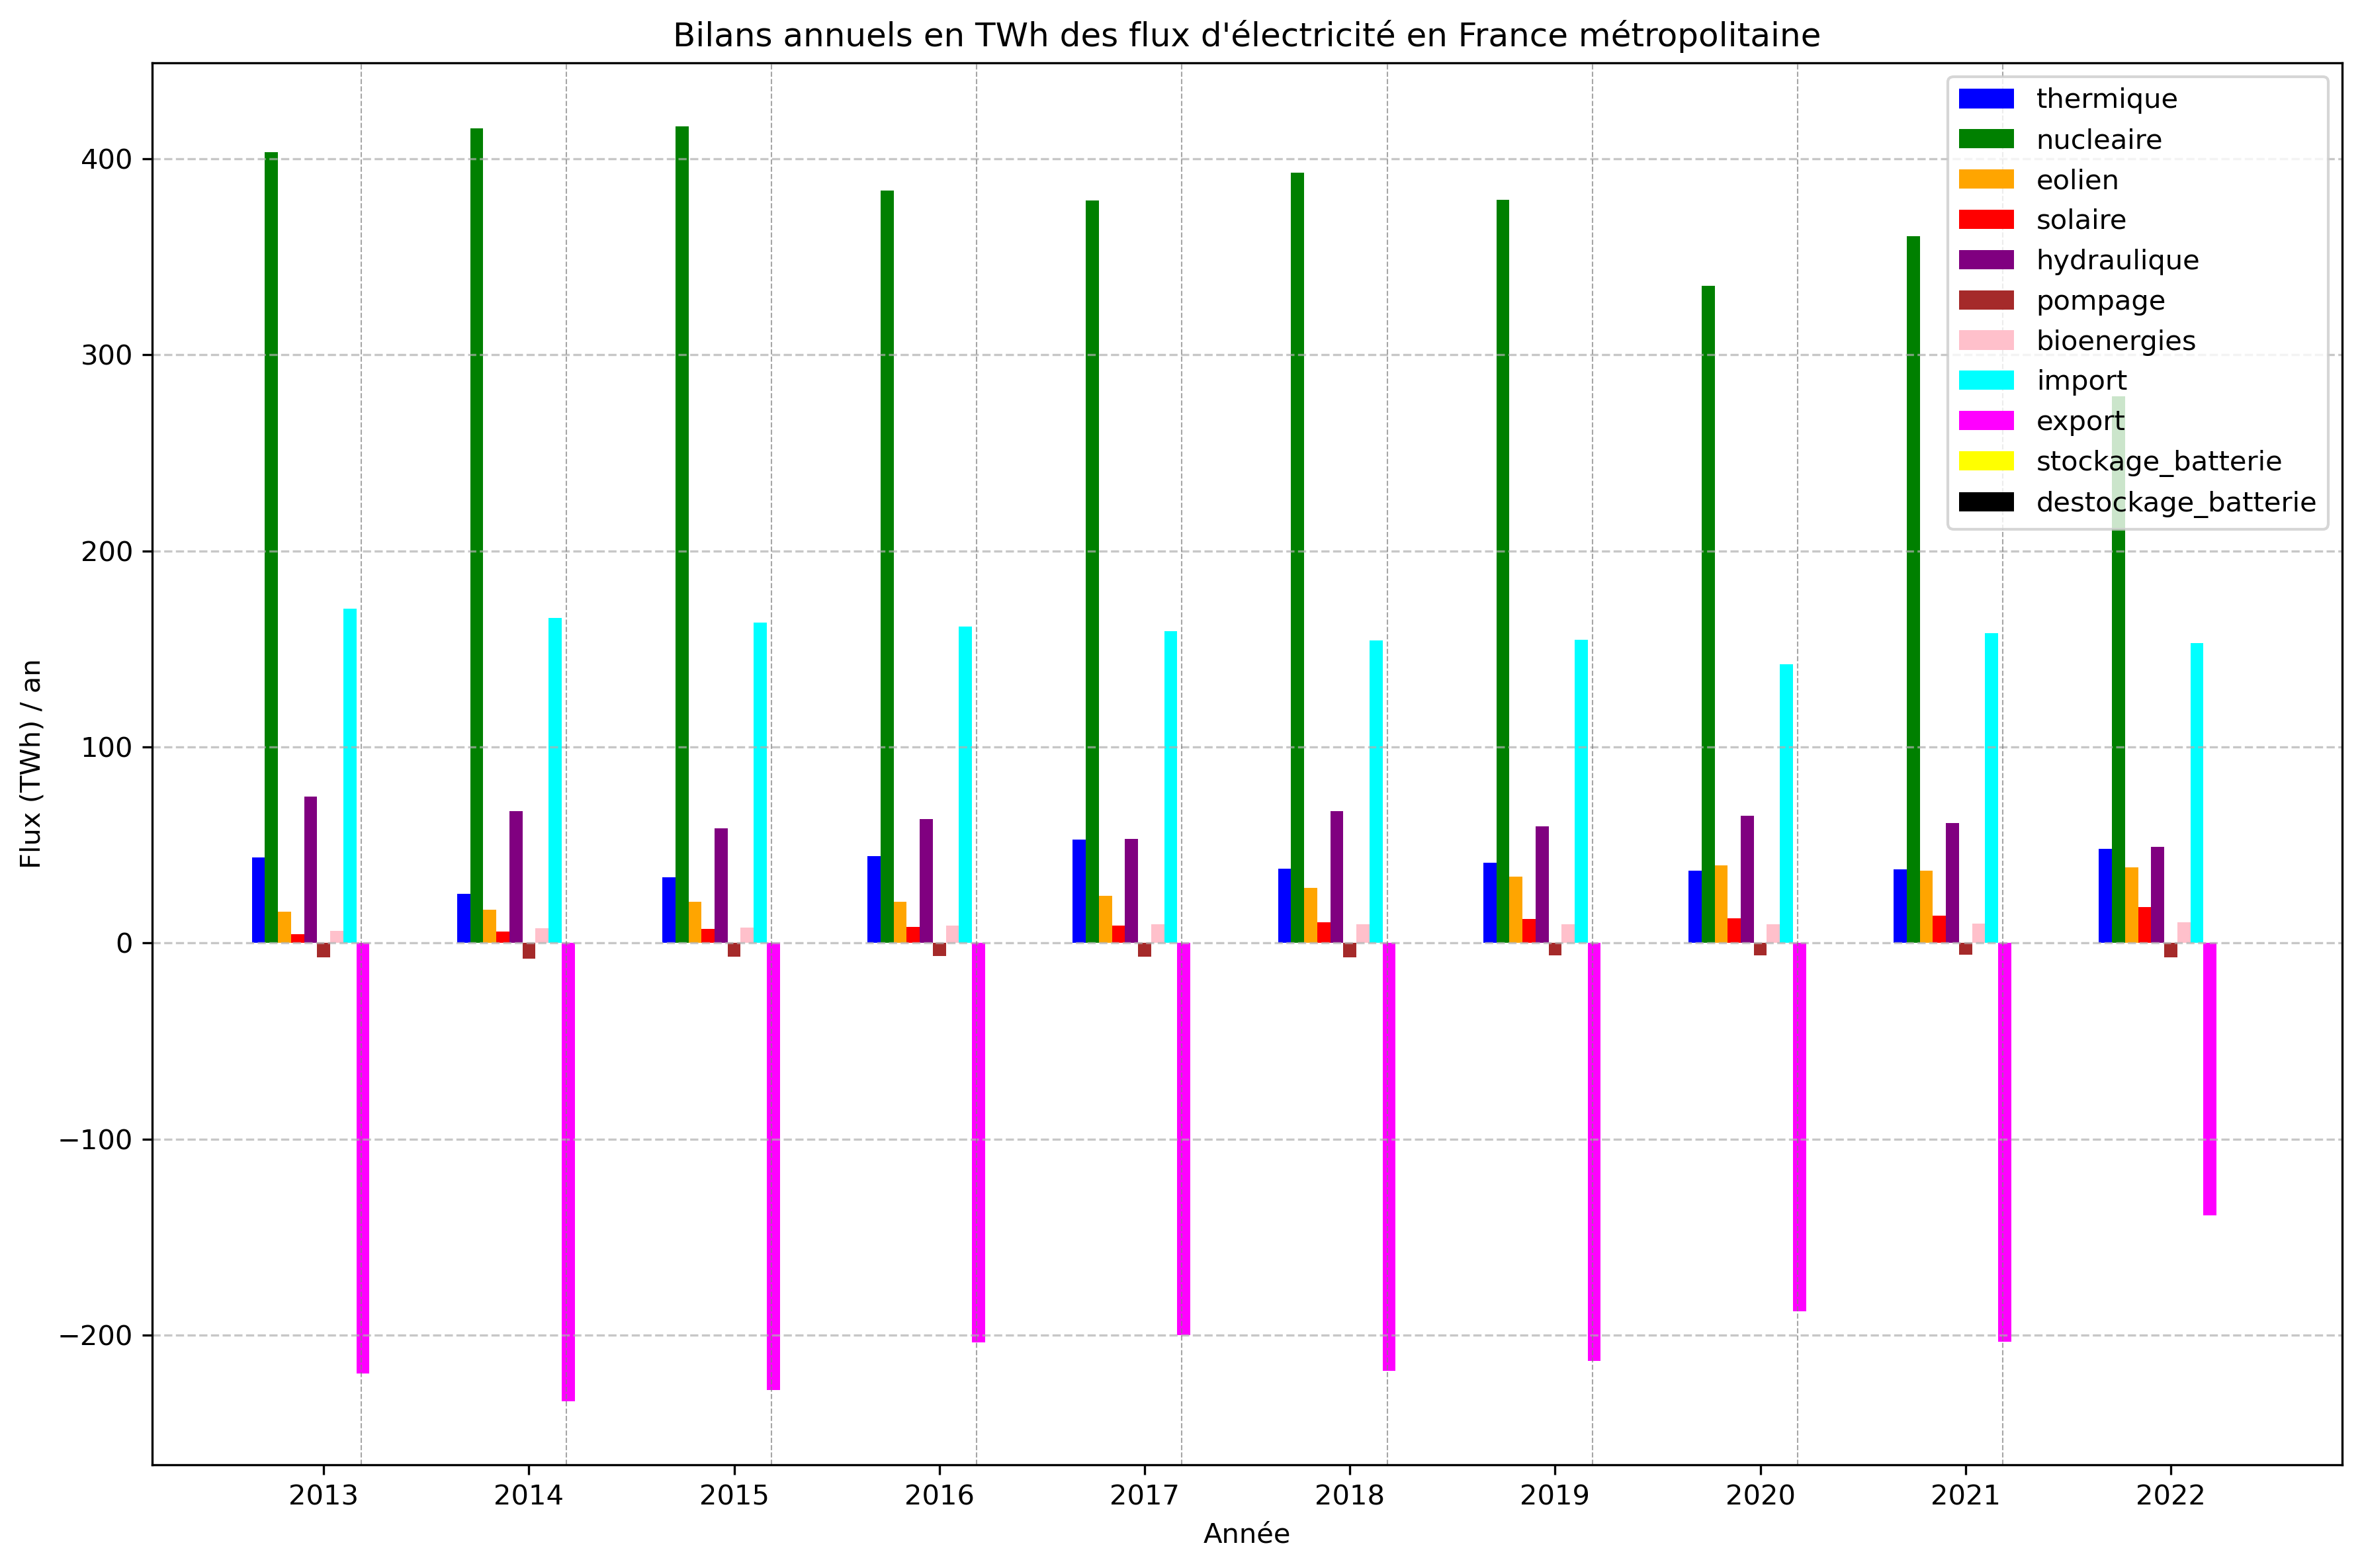

In [13]:
# ------------------- ANALYSE DES FLUX ANNUELS D'ENERGIES (sur les seules années complètes --------------------------------

# Création des colonnes 'export' et 'import'
df_eco2['export'] = df_eco2['ech_physiques'].apply(lambda x: x if x < 0 else 0)
df_eco2['import'] = df_eco2['ech_physiques'].apply(lambda x: x if x >= 0 else 0)

# Calcul du flux annuel d'énergies en MWh pour chaque année et chaque type de production
annees = range(2013, 2023)
flux_annuel = []

for annee in annees:
    # Filtrage des données pour l'année en cours
    df_annee = df_eco2[df_eco2['annee'] == annee]
    
    # Nombre total d'heures dans l'année
    nombre_heures = (len(df_annee)-1)*0.5
    
    # Calcul du flux annuel en MWh pour chaque type de production
    flux = {}
    for colonne in ['thermique', 'nucleaire', 'eolien', 'solaire', 'hydraulique', 'pompage',
                    'bioenergies', 'import', 'export', 'stockage_batterie', 'destockage_batterie']:
        flux[colonne] = (df_annee[colonne]*0.5).sum()
    
    # Ajout du flux annuel au résultat
    flux_annuel.append(flux)

# Création d'un DataFrame pour stocker les résultats
df_flux_annuel = pd.DataFrame(flux_annuel, index=annees)

# Couleurs pour chaque type de production
couleurs = ['blue', 'green', 'orange', 'red', 'purple', 'brown', 'pink', 'cyan', 'magenta', 'yellow', 'black']

# Largeur des barres
largeur_barres = 0.7 / len(df_flux_annuel.columns)

# Tracage des histogrammes pour chaque année
plt.figure(figsize=(12, 8), dpi = 300)
for i, colonne in enumerate(df_flux_annuel.columns):
    positions = np.arange(len(df_flux_annuel)) + i * largeur_barres
    plt.bar(positions, df_flux_annuel[colonne].divide(1000000), width=largeur_barres, color=couleurs[i], label=colonne)
    
plt.xlabel('Année')
plt.ylabel('Flux (TWh) / an')
plt.title("Bilans annuels en TWh des flux d'électricité en France métropolitaine" )
plt.xticks(np.arange(len(df_flux_annuel)) + largeur_barres * (len(df_flux_annuel.columns) - 1) / 2, df_flux_annuel.index)

plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
# Ajout de lignes verticales discrètes pour délimiter les groupes de barres
for pos in np.arange(1, len(df_flux_annuel)):
    plt.axvline(x=pos - 0.5, color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

plt.grid(axis='y', linestyle='--', alpha=0.7)

# Réduction de la taille de police des étiquettes de l'axe des abscisses
plt.tick_params(axis='x', labelsize=10)

# Ajustement de la mise en page pour s'assurer que tout est visible
plt.tight_layout()
plt.show()


In [14]:
# --------------------------    TRAITEMENT ET ANALYSE DES TCO (taux de couverture régionale) -----------------------------
# Création, dans df_eco2, des colonnes TCO (taux de couverture régionale)
# TCO_filiere = production de la filière dans la région / consommation totale d'électricité dans la région X 100 [%]

# Les calculs de TCO sont effectués séparément de la création des colonnes avec valeurs arrondies afin de
# limiter la perte de valeurs lors du calcul du total des TCO

tco_thermique =df_eco2['thermique']/df_eco2['consommation']*100
tco_nucleaire=df_eco2['nucleaire']/df_eco2['consommation']*100
tco_eolien=df_eco2['eolien']/df_eco2['consommation']*100
tco_solaire=df_eco2['solaire']/df_eco2['consommation']*100
tco_hydraulique=df_eco2['hydraulique']/df_eco2['consommation']*100
tco_pompage=df_eco2['pompage']/df_eco2['consommation']*100
tco_bioenergies=df_eco2['bioenergies']/df_eco2['consommation']*100
tco_export=df_eco2['export']/df_eco2['consommation']*100
tco_import=df_eco2['import']/df_eco2['consommation']*100
tco_stockage_batterie=df_eco2['stockage_batterie']/df_eco2['consommation']*100
tco_destockage_batterie=df_eco2['destockage_batterie']/df_eco2['consommation']*100
total_tco = tco_thermique+tco_nucleaire+tco_eolien+tco_solaire+tco_hydraulique+tco_pompage+ tco_bioenergies+tco_export+tco_import+tco_stockage_batterie+tco_destockage_batterie
tco_prod_tot=tco_thermique+tco_nucleaire+tco_eolien+tco_solaire+tco_hydraulique+tco_bioenergies

df_eco2['tco_thermique']=round(tco_thermique,2)
df_eco2['tco_nucleaire']=round(tco_nucleaire,2)
df_eco2['tco_eolien']=round(tco_eolien,2)
df_eco2['tco_solaire']=round(tco_solaire,2)
df_eco2['tco_hydraulique']=round(tco_hydraulique,2)
df_eco2['tco_pompage']=round(tco_pompage,2)
df_eco2['tco_bioenergies']=round(tco_bioenergies,2)
df_eco2['tco_export']=round(tco_export,2)
df_eco2['tco_import']=round(tco_import,2)
df_eco2['tco_stockage_batterie']=round(tco_stockage_batterie,2)
df_eco2['tco_destockage_batterie']=round(tco_destockage_batterie,2)
df_eco2['total_tco']=round(total_tco,2)
df_eco2['tco_prod_tot']=round(tco_prod_tot,2)

df_eco2.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2121396 entries, 12 to 2121407
Data columns (total 39 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   region                   object        
 1   date                     object        
 2   heure                    object        
 3   consommation             float64       
 4   mois                     int32         
 5   annee                    int32         
 6   date_ym                  object        
 7   date_heure               datetime64[ns]
 8   thermique                float64       
 9   nucleaire                float64       
 10  eolien                   float64       
 11  solaire                  float64       
 12  hydraulique              float64       
 13  pompage                  float64       
 14  bioenergies              float64       
 15  ech_physiques            float64       
 16  stockage_batterie        float64       
 17  destockage_batterie      float6

In [15]:
# Export du dataFrame df_eco2 au format CSV
df_eco2.to_csv('df_eco2_cleaned_tco_tch.csv', sep=';', encoding='latin-1')

In [16]:
display(df_eco2)

,region,date,heure,consommation,mois,annee,date_ym,date_heure,thermique,nucleaire,...,tco_solaire,tco_hydraulique,tco_pompage,tco_bioenergies,tco_export,tco_import,tco_stockage_batterie,tco_destockage_batterie,total_tco,tco_prod_tot
12,CENTRE VAL DE LOIRE,2013-01-01,00:30:00,2476.0,1,2013,2013-01,2013-01-01 00:30:00,90.0,9085.0,...,0.0,1.37,0.00,1.01,-293.50,0.00,0.0,0.0,99.96,393.46
13,PAYS DE LA LOIRE,2013-01-01,00:30:00,3595.0,1,2013,2013-01,2013-01-01 00:30:00,127.0,0.0,...,0.0,0.00,0.00,0.89,0.00,90.46,0.0,0.0,99.94,9.49
14,GRAND EST,2013-01-01,00:30:00,4943.0,1,2013,2013-01,2013-01-01 00:30:00,319.0,9137.0,...,0.0,28.69,0.00,1.15,-143.68,0.00,0.0,0.0,99.90,243.58
15,ILE DE FRANCE,2013-01-01,00:30:00,9134.0,1,2013,2013-01,2013-01-01 00:30:00,685.0,0.0,...,0.0,0.00,0.00,1.55,0.00,90.75,0.0,0.0,99.98,9.23
16,OCCITANIE,2013-01-01,00:30:00,5228.0,1,2013,2013-01,2013-01-01 00:30:00,78.0,2497.0,...,0.0,18.04,-0.25,1.55,0.00,24.35,0.0,0.0,99.96,75.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121403,GRAND EST,2023-01-31,23:30:00,5719.0,1,2023,2023-01,2023-01-31 23:30:00,1314.0,5084.0,...,0.0,10.49,-0.10,2.52,-59.28,0.00,0.0,0.0,100.03,159.42
2121404,AUVERGNE RHONE ALPES,2023-01-31,23:30:00,8927.0,1,2023,2023-01,2023-01-31 23:30:00,390.0,13291.0,...,0.0,32.90,-0.16,1.25,-88.91,0.00,0.0,0.0,100.00,189.07
2121405,BOURGOGNE FRANCHE COMTE,2023-01-31,23:30:00,2687.0,1,2023,2023-01,2023-01-31 23:30:00,166.0,0.0,...,0.0,8.19,0.00,1.82,0.00,76.07,0.0,0.0,100.07,24.00
2121406,PROVENCE ALPES COTE D AZUR,2023-01-31,23:30:00,6139.0,1,2023,2023-01,2023-01-31 23:30:00,350.0,0.0,...,0.0,30.14,0.00,1.40,0.00,62.08,0.0,0.0,100.03,37.95
